In [1]:
import pandas as pd
import sqlite3
import os
import seaborn as sb
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install msgpack
!{sys.executable} -m pip install matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

C:\Users\Work\Anaconda3\python.exe: No module named pip
C:\Users\Work\Anaconda3\python.exe: No module named pip
C:\Users\Work\Anaconda3\python.exe: No module named pip


In [2]:
# create the sqlite DB
db = sqlite3.connect("Recalls.db")

In [3]:
df = pd.read_excel(r".\FSIS-Recall-Summary-2014.xlsx", header=1, index =2)

        #convert pandas to SQL table
df.to_sql("recalls", db, if_exists="replace")

def run_query(query):
    return pd.read_sql_query(query,db)

os.getcwd

C:\Users\Work\Anaconda3\lib\site-packages\pandas\core\generic.py:2712: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


<function nt.getcwd()>

In [4]:
query = """
SELECT * 
FROM sqlite_master
ORDER BY name;
"""
run_query(query)

# df2 = pd.read_sql('SELECT * FROM sqlite_master ORDER by name', db)
# df2     # -- EXAMPLE OF WHAT CAN BE DONE IF NOT USING A FUNCTION --

,type,name,tbl_name,rootpage,sql
0,index,ix_recalls_index,recalls,3,"CREATE INDEX ""ix_recalls_index""ON ""recalls"" (""..."
1,table,recalls,recalls,2,"CREATE TABLE ""recalls"" (\n""index"" INTEGER,\n ..."


In [5]:
query_table_help = """
select * from PRAGMA_TABLE_INFO('recalls');
"""
run_query(query_table_help)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,Recall Date,TIMESTAMP,0,None,0
2,2,Recall Number,TEXT,0,None,0
3,3,Recall Class,TEXT,0,None,0
4,4,Product,TEXT,0,None,0
5,5,Reason for Recall,TEXT,0,None,0
6,6,Pounds Recalled,INTEGER,0,None,0


In [6]:
# show_all = pd.read_sql('SELECT * FROM recalls', db)
# show_all   # -- Better to assign new value for each query --

query = """
SELECT * 
FROM recalls;
"""
run_query(query)

,index,Recall Date,Recall Number,Recall Class,Product,Reason for Recall,Pounds Recalled
0,0,2014-01-10 00:00:00,001-2014,I,Mechanically Separated Chicken Products,Salmonella,33840
1,1,2014-01-13 00:00:00,002-2014,I,Various Beef Products,Other,42103
2,2,2014-01-15 00:00:00,003-2014,I,Beef Franks,Undeclared Allergen,2664
3,3,2014-01-17 00:00:00,004-2014,II,Beef and Pork Products,Undeclared Allergen,130000
4,4,2014-01-17 00:00:00,005-2014,I,Spiral Hams,Listeria monocytogenes,67113
...,...,...,...,...,...,...,...
89,89,2014-12-27 00:00:00,090-2014,I,Pork products,Undeclared Allergen,83666
90,90,2014-12-27 00:00:00,091-2014,I,Chicken and Beef Products,Undeclared Allergen,55813
91,91,2014-12-29 00:00:00,092-2014,I,Beef and Pork Products,Undeclared Allergen,38400
92,92,2014-12-31 00:00:00,093-2014,I,Chicken Products,Undeclared Allergen,5300


In [7]:
# salm_sorted = pd.read_sql('SELECT * FROM recalls WHERE `Reason for Recall` = "Salmonella" ORDER BY `Pounds Recalled` DESC', db)
# salm_sorted

query = """
SELECT * 
FROM recalls
WHERE `Reason for Recall` = 'Salmonella'
ORDER BY `Pounds Recalled` DESC;
"""
run_query(query)

,index,Recall Date,Recall Number,Recall Class,Product,Reason for Recall,Pounds Recalled
0,14,2014-02-15 00:00:00,015-2014,I,Dried Egg Products,Salmonella,309594
1,0,2014-01-10 00:00:00,001-2014,I,Mechanically Separated Chicken Products,Salmonella,33840
2,72,2014-10-24 00:00:00,073-2014,I,Chicken Products,Salmonella,28980
3,43,2014-07-03 00:00:00,044-2014,I,Chicken Products,Salmonella,0


In [8]:
# total_pounds = pd.read_sql('SELECT SUM (`Pounds Recalled`) AS "Total Pounds Recalled" FROM recalls', db)
# total_pounds

query = """
SELECT SUM(`Pounds Recalled`) AS "Total Pounds Recalled" 
FROM recalls;
"""
run_query(query)

,Total Pounds Recalled
0,18675102


In [9]:
reason_case = pd.read_sql('SELECT `Reason for Recall`, COUNT(*) AS "Number of Cases" FROM recalls GROUP BY `Reason for Recall` ORDER BY COUNT(*) DESC LIMIT 6', db)
reason_case

# query = """
# SELECT `Reason for Recall`, 
# COUNT(*) AS "Number of Cases"
# FROM recalls
# GROUP BY `Reason for Recall`
# ORDER BY COUNT(*) DESC
# LIMIT 6;
# """
# run_query(query)

,Reason for Recall,Number of Cases
0,Undeclared Allergen,43
1,Other,23
2,Listeria monocytogenes,7
3,Extraneous Material,6
4,Salmonella,4
5,Processing Defect,4


Text(0.5, 0.98, 'REASON FOR RECALL')

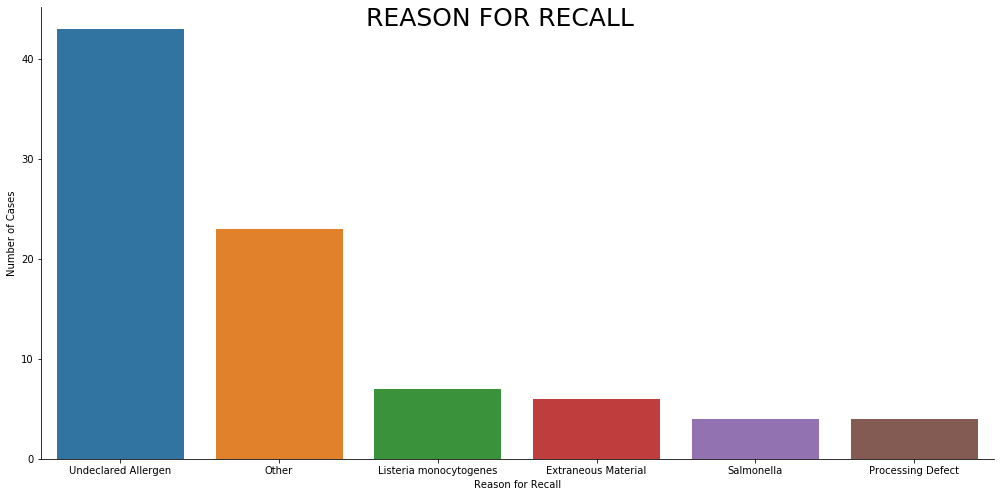

In [10]:
#reason_case.set_index("Reason for Recall").plot(kind="bar")

catplot = sb.catplot(
    x = 'Reason for Recall',
    y = 'Number of Cases',
    data= reason_case,
    kind= 'bar',
    height= 7,
    aspect=2)
catplot.fig.suptitle('REASON FOR RECALL', fontsize=25)

In [11]:
product_types = pd.read_sql('''
SELECT Product AS "Product Types", Count(*) AS "Number of Cases" FROM recalls WHERE Product LIKE "%chicken%"
UNION 
SELECT Product AS "Beef Products", Count(*) AS "Number of Cases" FROM recalls WHERE Product LIKE "%beef%" 
UNION 
SELECT Product AS "Pork Products", Count(*) AS "Number of Cases" FROM recalls WHERE Product LIKE "%ham%" OR Product LIKE "%pork%" 
UNION 
SELECT Product AS "Other Products", Count(*) AS "Number of Cases" FROM recalls WHERE Product NOT LIKE "%beef%" AND Product NOT LIKE "%chicken%" AND Product NOT LIKE "%ham%" AND Product NOT LIKE "%pork%"
''', db)
product_types


,Product Types,Number of Cases
0,Beef and Pork Products,20
1,Cheeseburger Mac Products,27
2,Mechanically Separated Chicken Products,28
3,Various Beef Products,22


In [20]:
rows_to_update = [0, 1, 2, 3]
cols_to_update = ['Product Types']
values = [['Pork Products'],['Other Products'],['Chicken Products'], ['Beef Products']]
product_types.loc[rows_to_update, cols_to_update] = values

# product_types.loc[product_types['Product Types'] == 'Cheeseburger Mac Products', 'Product Types'] = 'Other Products'
# product_types.loc[product_types['Product Types'] == 'Mechanically Separated Chicken Products', 'Product Types'] = 'Chicken Products'
# product_types.loc[product_types['Product Types'] == 'Beef and Pork Products', 'Product Types'] = 'Pork Products'
# product_types.loc[product_types['Product Types'] == 'Various Beef Products', 'Product Types'] = 'Beef Products'
product_types

,Product Types,Number of Cases
0,Pork Products,20
1,Other Products,27
2,Chicken Products,28
3,Beef Products,22


Text(0.5, 0.98, 'RECALLED PRODUCTS TYPES')

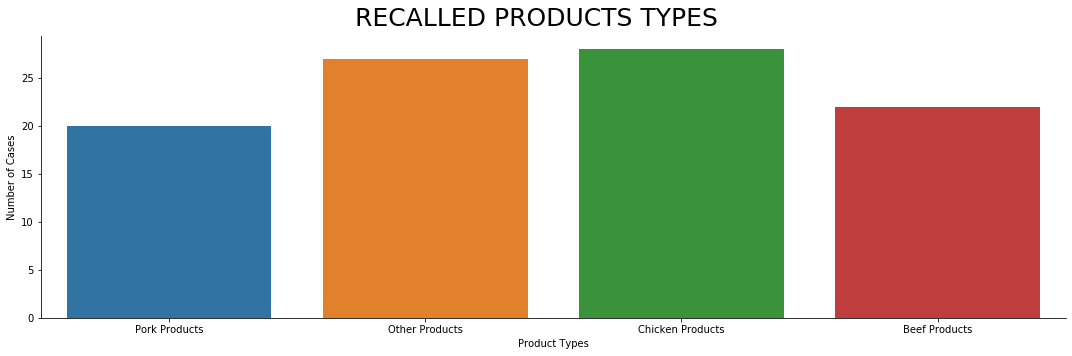

In [21]:
#reason_case.set_index("Reason for Recall").plot(kind="bar")

catplot = sb.catplot(
    x = 'Product Types',
    y = 'Number of Cases',
    data= product_types,
    kind= 'bar',
    height= 5,
    aspect= 3)
plt.subplots_adjust(top=0.9)
catplot.fig.suptitle('RECALLED PRODUCTS TYPES', fontsize=25)